# Wine Quality コンペティション

### コンペ概要
ワインの特徴を示すいくつかの変数から質を予測するコンペです.
(期間: 5/7まで)

### 配布データ
- train.csv: 訓練用のデータです. qualityのカラムの値を予測するモデルをそれ以外のカラムのデータを用いて構築してください.
- test.csv: このファイルのデータに対して質(quality)を予測してもらいます.

### 評価指標
正解データとの平均二乗誤差で評価します.
データ数: N, 真の値: y, 予測値: $\hat{y}$ とすると, 平均二乗誤差(MSE)は

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) ^ 2
$$

で定義されます.
### 提出方法
以下のような形式のcsvファイル```submit.csv```をiLect上で提出してください.

```
quality
[予測値1]
[予測値2]
...

```

注意点
- 1行目はヘッダーです. 必ず```quality```と書いてください.
- 2行目以降は, test.csvの順番と対応させる形で予測値を各行に1つずつ出力してください.(**予測値は小数値でもokです**)
- sample_submission.csvが提出形式のサンプルになので, こちらも参照してみてください.
- **提出前にフォーマットが合っているか必ず確認してください**

### 賞金
```
1位: 10,000円
2位: 7,000円
3位: 3,000円
```


In [10]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

In [11]:
df = pd.read_csv('train.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# 変数の標準化を実行
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(df.loc[:,["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]) # すべての説明変数を変換
y_std = ss.fit_transform(df.loc[:,["quality"]])

In [17]:
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
# 標準化したデータで線形モデルを学習させる
lr_std = LinearRegression()
lr_std.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# 標準偏回帰係数を出力
lr_std.coef_

array([[ 0.13 , -0.228, -0.075,  0.064, -0.085,  0.033, -0.156, -0.11 ,
        -0.034,  0.165,  0.359]])

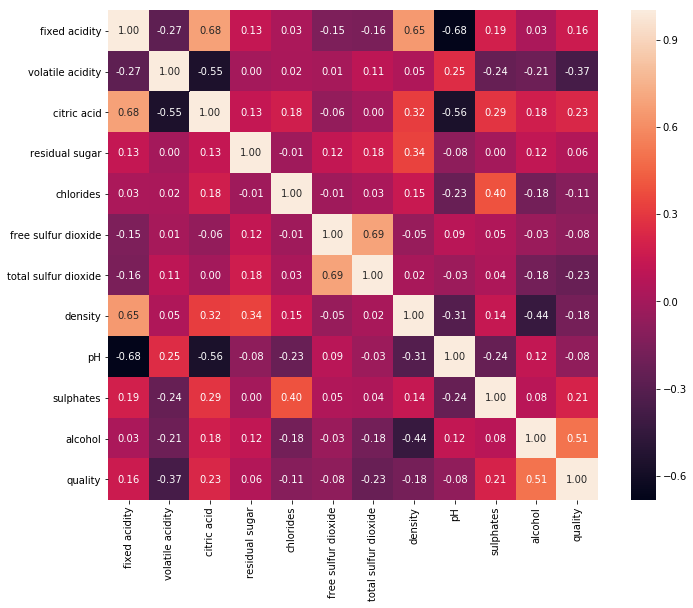

In [20]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [30]:
X = df.loc[:, :].values
X

array([[  7.4 ,   0.7 ,   0.  , ...,   0.56,   9.4 ,   5.  ],
       [  7.8 ,   0.88,   0.  , ...,   0.68,   9.8 ,   5.  ],
       [  7.8 ,   0.76,   0.04, ...,   0.65,   9.8 ,   5.  ],
       ..., 
       [  7.  ,   0.69,   0.07, ...,   0.6 ,  11.3 ,   6.  ],
       [  7.  ,   0.69,   0.07, ...,   0.6 ,  11.3 ,   6.  ],
       [  7.1 ,   0.39,   0.12, ...,   0.53,  13.3 ,   6.  ]])

In [31]:
y = df.loc[:, ['quality']].values

In [32]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lr.intercept_

array([ -1.350e-13])

In [34]:
lr.coef_

array([[  1.051e-16,  -1.794e-15,  -8.604e-16,  -1.110e-16,  -4.649e-15,
          1.665e-16,  -2.220e-16,   1.410e-13,   1.693e-15,   4.163e-17,
          5.204e-17,   1.000e+00]])

In [35]:
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [36]:
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X, y), len(y), 2))

adjusted R^2
train: 1.000000
